In [ ]:
from google.colab import files
uploaded = files.upload()

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))



Saving heart_all.txt to heart_all.txt
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Python program to generate word vectors using Word2Vec 
  
# importing all necessary modules 
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 

import string
  
warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec 


for file in uploaded.keys():

  with open(file, "r") as file:
    s = file.read()

     # Replaces escape character with space 
    s = s.replace("\n", " ") 

    s = s.translate(str.maketrans('', '', string.punctuation))

  
   
  
    data = [] 
  
    # iterate through each sentence in the file 
    for i in sent_tokenize(s): 
        temp = [] 
      
        # tokenize the sentence into words 
        for j in word_tokenize(i): 
            if j not in stop_words:
              #filtered_word.append(w)
              temp.append(j.lower()) 
      
        data.append(temp) 
  
    # Create CBOW model 
    model1 = gensim.models.Word2Vec(data, min_count = 1,  
                                  size = 100, window = 5) 
      
    # Print results 
    print("Cosine similarity between 'heart' " + 
                  "and 'disease' - CBOW : ", 
        model1.similarity('heart', 'disease')) 
    
    print("Cosine similarity between 'heart' " + 
                  "and 'attack' - CBOW : ", 
        model1.similarity('heart', 'attack')) 
          
  
      
    # Create Skip Gram model 
    model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
                                                window = 5, sg = 1) 
      
    # Print results 
    print("Cosine similarity between 'heart' " +
              "and 'disease' - Skip Gram : ", 
        model2.similarity('heart', 'disease')) 
    
    print("Cosine similarity between 'heart' " +
              "and 'disease' - Skip Gram : ", 
        model2.similarity('heart', 'attack'))
    
    #find word that is mostly related to this term.
    print (model2.most_similar(positive=["disease"]))

    #find word that is not at the same cluster/group
    print(model2.doesnt_match(['heart', 'united', 'dieease', 'attack',]))

    #print(model2.most_similar(positive=["men", "disease"], negative=["women"], topn=3))
          
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Cosine similarity between 'heart' and 'disease' - CBOW :  0.43838376
Cosine similarity between 'heart' and 'attack' - CBOW :  0.22941132
Cosine similarity between 'heart' and 'disease' - Skip Gram :  0.99783534
Cosine similarity between 'heart' and 'disease' - Skip Gram :  0.99166536
[('heart', 0.9978352189064026), ('blood', 0.9976286292076111), ('symptoms', 0.9972833395004272), ('’', 0.9966098666191101), ('also', 0.9964278340339661), ('risk', 0.9961338043212891), ('may', 0.9960110187530518), ('women', 0.9958235621452332), ('include', 0.9957584738731384), ('if', 0.9954501986503601)]
united


In [ ]:
print(model2['heart'])

[ 0.04429037  0.05657653  0.10921429 -0.0463649   0.00561088  0.0130286
 -0.03289836  0.02464634  0.01824704 -0.08377025  0.00969296 -0.06973471
 -0.07837724 -0.08437517  0.00283296 -0.00079444  0.09084712 -0.05079357
 -0.13605608  0.00143758 -0.1377359   0.00126937  0.02050207 -0.06246082
 -0.12015753  0.00750226  0.11379667 -0.06648345  0.00631757 -0.18836483
  0.00570557 -0.00642797 -0.00410147 -0.08616624  0.00375323 -0.05662685
  0.03046965  0.00992723 -0.03210248 -0.03914869 -0.07749882 -0.10629496
 -0.00577747  0.0301953   0.04339898  0.06320229  0.06016641 -0.0530289
  0.11443693 -0.07617449 -0.00818957  0.11993892 -0.01255083  0.09416234
  0.01381915 -0.07833964  0.05790104  0.01309719  0.04276746 -0.01555503
 -0.17160675  0.00691161  0.07726306  0.00673456 -0.02037435  0.04220615
  0.0725956   0.04772351  0.15541561 -0.04231795 -0.07749867  0.02329527
 -0.10384172 -0.10272604  0.15100679  0.11912627 -0.19423287  0.02629785
 -0.04131761 -0.10696797  0.01253701 -0.10482229 -0.1

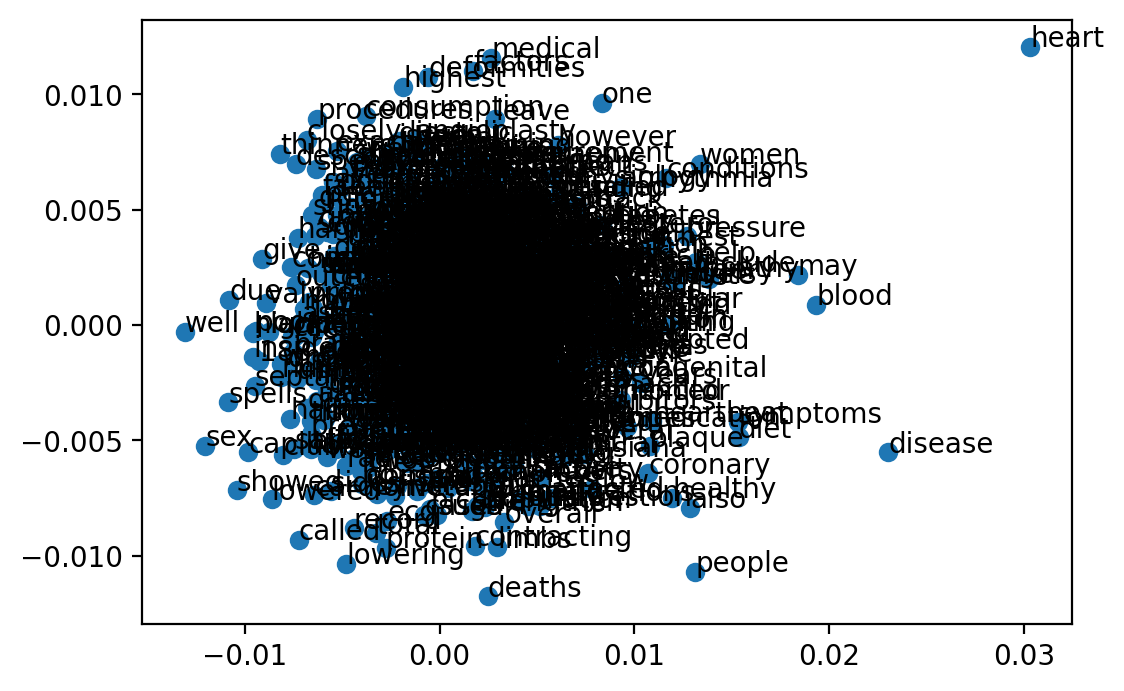

<Figure size 2000x2000 with 0 Axes>

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
X = model1[model1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
vwords = list(model1.wv.vocab)
for j, word in enumerate(vwords):
  pyplot.annotate(word, xy=(result[j, 0], result[j, 1]))
# plotting a line plot after changing it's width and height
f = pyplot.figure(figsize=(10, 10))
pyplot.rcParams['figure.dpi'] = 300

pyplot.show()